In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc

rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)
sns.set_theme()
sns.set(font_scale=3.0, style="whitegrid")

def get_avg_results(settings_files, alg):    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/{alg}/{set}"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        test_acc_list.append(test_accs[-1])


    return np.mean(test_acc_list), np.std(test_acc_list)

def get_feded_results(settings_files, n_pub, model, loss, weight_scheme, summary=True):

    test_acc_lists = []
    ensemble_test_acc = []
    dataset = settings_files[0].split('_')[0]

    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/feded/{set}"

        with open(f"{results_path}/w{weight_scheme}_student_emnist_{model}_{loss}_test_results_{n_pub}.npy", "rb") as f:
            test_acc_lists.append(np.load(f)[0])

            
        with open(f"{results_path}/w{weight_scheme}_ensemble_test_acc.npy", "rb") as f:
            ensemble_test_acc.append(np.load(f)[0])

    if summary:
        return (np.mean(test_acc_lists), np.std(test_acc_lists)), (np.mean(ensemble_test_acc), np.std(ensemble_test_acc))
    else:
        return test_acc_lists, ensemble_test_acc
                                                                

# Tables

In [9]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = 60000
model = "emnist_cnn1"
student_model = "cnn3"

dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]

table = "\\begin{table}[]\centering\\begin{tabular}{c|cccc}\n"
table += "Algorithm & $\\alpha=10$ & $\\alpha=1$ & $\\alpha=0.1$ & $\\alpha=0.01$ \\\\ \\hline \n"

table += "\\textsc{FedAvg} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedavg")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedProx} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedprox")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} ($MSE$) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} ($CE$) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student_model, "ce", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student_model, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\end{tabular} \n \\caption{Caption} \n \\label{tab:my_label} \n \\end{table}"

print(table)

\begin{table}[]\centering\begin{tabular}{c|cccc}
Algorithm & $\alpha=10$ & $\alpha=1$ & $\alpha=0.1$ & $\alpha=0.01$ \\ \hline 
\textsc{FedAvg} & 78.85$\pm$1.14 & 78.29$\pm$1.11 & 72.36$\pm$1.51 & 65.95$\pm$1.92 \\ 
 \textsc{FedProx} & 78.79$\pm$1.15 & 78.30$\pm$1.13 & 72.39$\pm$1.45 & 66.00$\pm$1.90 \\ 
 \textsc{FedED} & 80.02$\pm$0.74 & 79.21$\pm$0.80 & 65.36$\pm$3.47 & 39.06$\pm$4.39 \\ 
 \textsc{FedED-w1} & 80.02$\pm$0.84 & 80.44$\pm$0.80 & 66.41$\pm$7.08 & 33.18$\pm$6.14 \\ 
 \textsc{FedED-w2} ($MSE$) & 77.83$\pm$1.12 & 77.67$\pm$1.06 & 75.14$\pm$1.78 & 74.98$\pm$1.40 \\ 
 \textsc{FedED-w2} ($CE$) & 79.42$\pm$1.13 & 80.34$\pm$0.94 & 80.62$\pm$1.31 & 82.98$\pm$1.10 \\ 
 \textsc{Ensemble} & 78.03$\pm$1.10 & 78.21$\pm$1.04 & 64.70$\pm$3.46 & 35.03$\pm$4.41 \\ 
 \textsc{Ensemble-w1} & 78.15$\pm$1.13 & 79.04$\pm$1.01 & 70.62$\pm$4.47 & 38.57$\pm$14.48 \\ 
 \textsc{Ensemble-w2} & 78.26$\pm$1.10 & 79.74$\pm$0.89 & 80.48$\pm$1.12 & 81.18$\pm$1.06 \\ 
 \end{tabular} 
 \caption{Caption} 
 \

# Figures

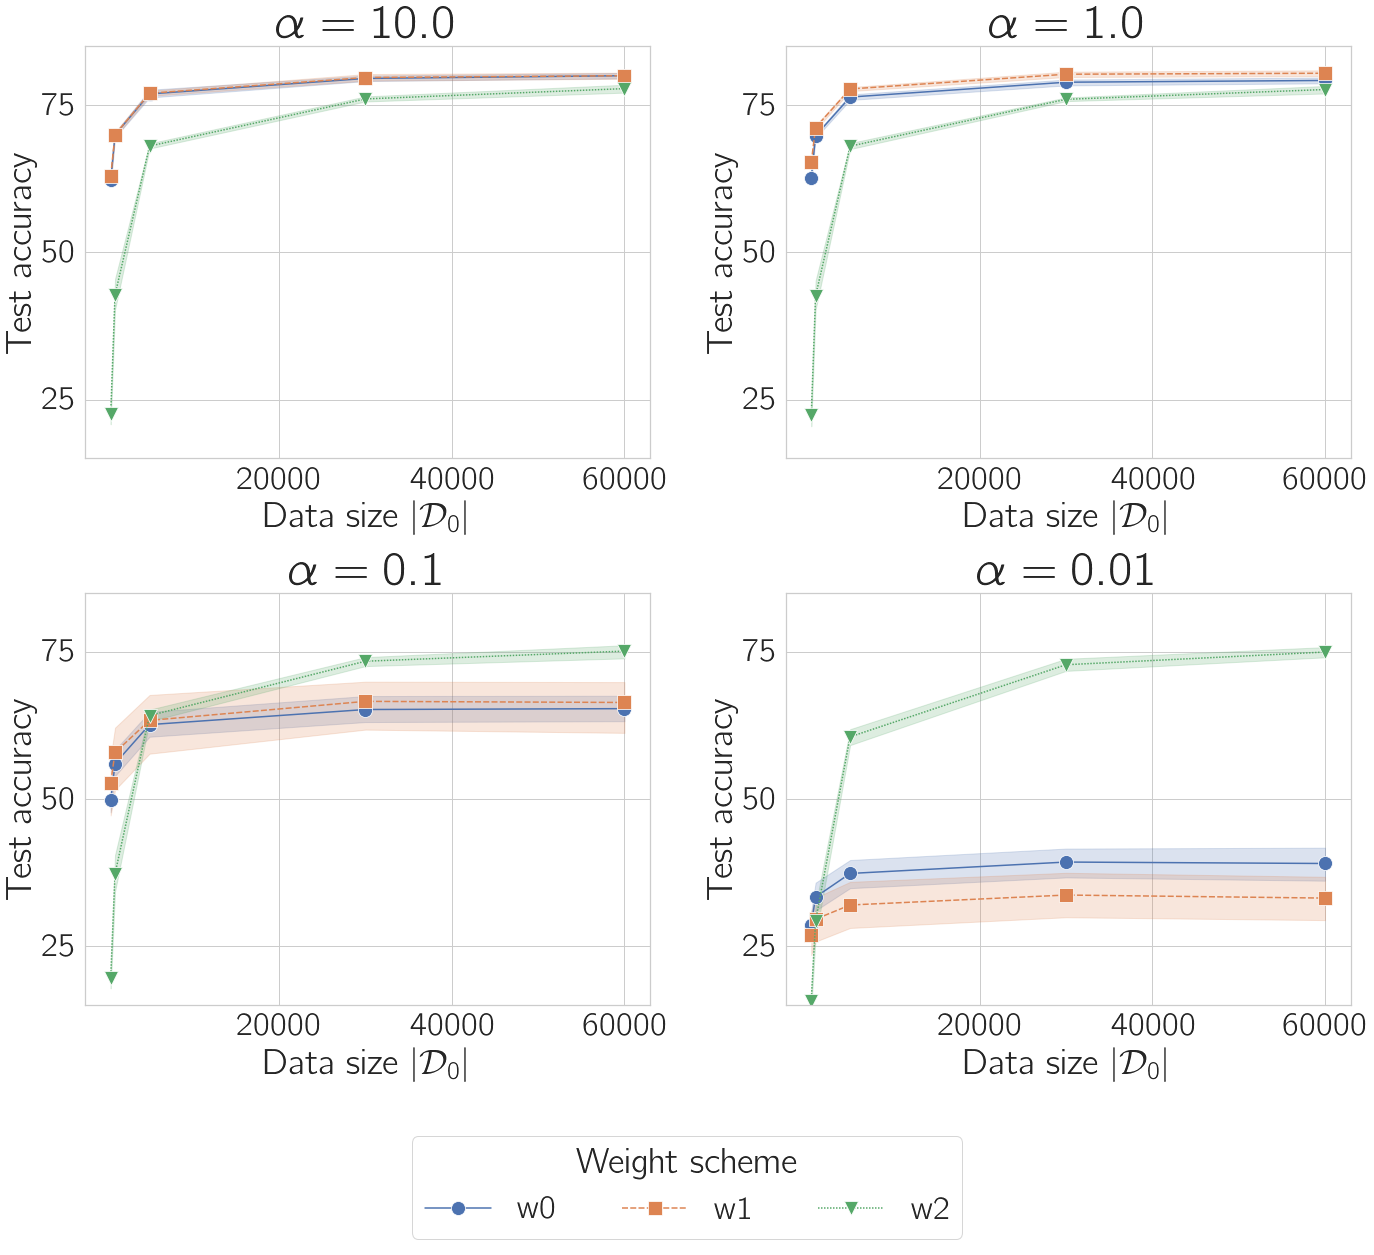

In [5]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
model = "emnist_cnn1"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
schemes = [0, 1, 2]
student_model = "cnn3"

data = []
for d in dists:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], d, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Dist', 'Scheme'])

fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax = ax.flatten()
markers = ['o', 's', 'v']
for i in range(4):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.Dist == dists[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Scheme',
    style='Scheme', 
    palette=["C0", "C1", "C2"],
    legend=False)

    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'Data size $|\mathcal{D}_0|$')
    ax[i].set_title(r'$\alpha={}$'.format(dists[i][4:]), fontsize=48)
    ax[i].set_xticks([20000, 40000, 60000])
    ax[i].set_ylim([15, 85])
    ax[i].set_yticks([25, 50, 75])

fig.legend(title='Weight scheme', handles=p.lines, labels=['w0', 'w1', 'w2'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)
plt.savefig('../../thesis_images/emnist_npub.png', dpi=300)
plt.show()

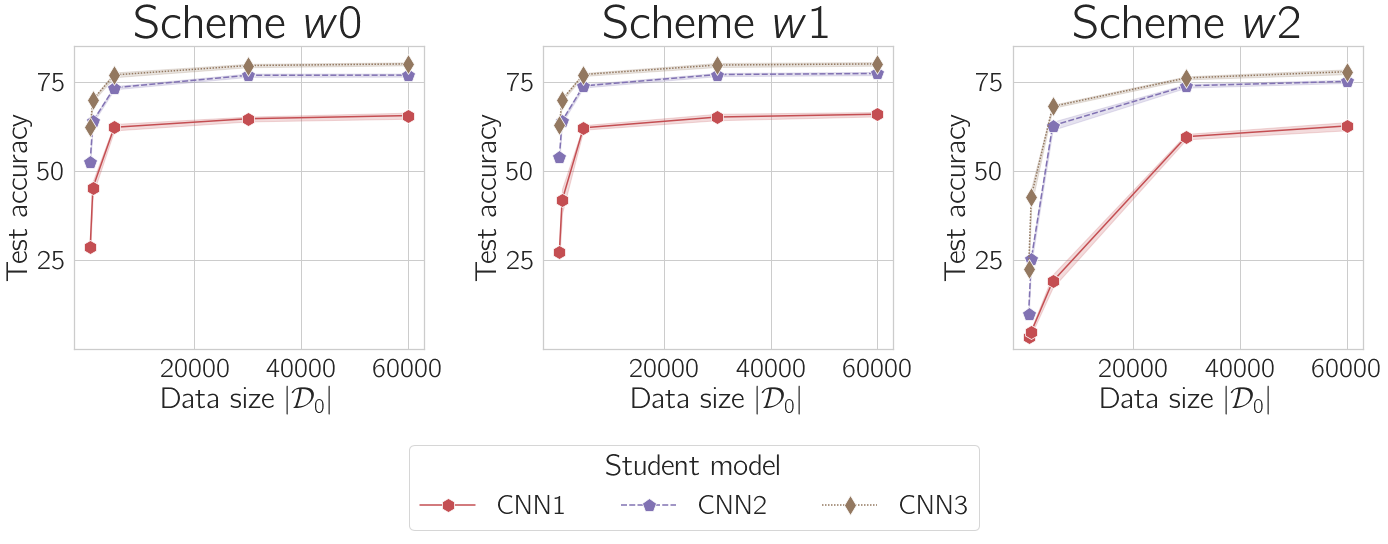

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
schemes = [0, 1, 2]
model = "emnist_cnn1"
students = ["cnn1", "cnn2", "cnn3"]
dist = "niid10.0"

data = []
for stu in students:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{dist}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, stu, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], stu, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Student model', 'scheme'])

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
markers = ['h', 'p', 'd']
for i in range(3):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.scheme == schemes[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Student model',
    style='Student model', 
    palette=["C3", "C4", "C5"],
    legend=False)
    
    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'Data size $|\mathcal{D}_0|$')
    ax[i].set_title(r'Scheme $w{}$'.format(i), fontsize=48)
    ax[i].set_xticks([20000, 40000, 60000])
    ax[i].set_ylim([0, 85])
    ax[i].set_yticks([25, 50, 75])

fig.legend(title='Student model', handles=p.lines, labels=['CNN1', 'CNN2', 'CNN3'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig('../../thesis_images/emnist_students_comparison.png', dpi=300)
plt.show()